## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
# Display the data table for preview
treatment_results = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
treatment_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice = treatment_results["Mouse ID"].count()
mice

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
treatment_results.loc[treatment_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = treatment_results.loc[treatment_results.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID':]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = treatment_results.loc[treatment_results["Mouse ID"]!="g989"]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice = clean_df['Mouse ID'].count()
mice

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stds = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
vars = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sems = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":vars,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems})
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


summary_stats_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

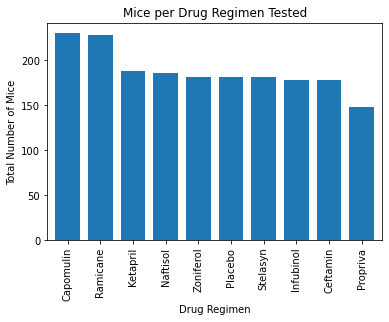

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Use drug_counts to show the total number of mice tested for each drug regimen
drug_counts = clean_df['Drug Regimen'].value_counts()
# Tell matplotlib to make a bar chart 
drug_counts.plot(kind='bar', width=.75)

# Give chart labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Mice per Drug Regimen Tested")
plt.show()

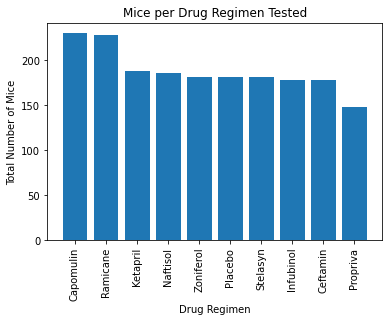

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_counts = clean_df['Drug Regimen'].value_counts()
# Make a bar chart using pyplot
# Retrieve drug regimen name using index.array
plt.bar(drug_counts.index.array, drug_counts.values)
plt.xticks(rotation="vertical")
# Create labels
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Mice per Drug Regimen Tested")
plt.show()

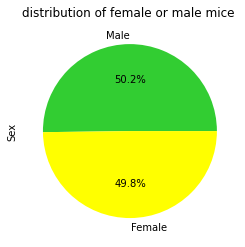

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get number of male and female mice using value counts
gender_count = treatment_results.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()

#Create the pie chart
gender_count.plot.pie(y='Sex',autopct="%1.1f%%",title = "distribution of female or male mice ", legend=False, colors = ["limegreen", "yellow"])

plt.show()


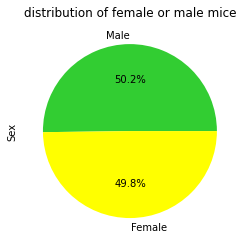

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

colors = ["limegreen", "yellow"]

# The values of each section of the pie chart 
male_mice = treatment_results.loc[treatment_results["Sex"] == "Male"]
male_count = male_mice["Mouse ID"].nunique()
female_mice = treatment_results.loc[treatment_results["Sex"] == "Female"]
female_count = female_mice["Mouse ID"].nunique()
female_count
sizes = [male_count, female_count]

# Create the pie chart based upon the values above
plt.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", startangle=0)
plt.title('distribution of female or male mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTumor_df = treatment_results.groupby(["Mouse ID"]).max()
maxTumor_df = maxTumor_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = maxTumor_df[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12.0,26.0,48.710661,0.0
245,z578,45,Ramicane,Male,11.0,16.0,30.638696,0.0
246,z581,45,Infubinol,Female,24.0,25.0,62.754451,3.0
247,z795,45,Naftisol,Female,13.0,29.0,65.741070,3.0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print()
tumor_vol_list   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

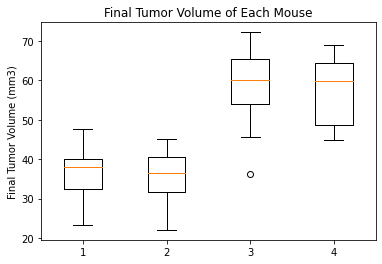

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

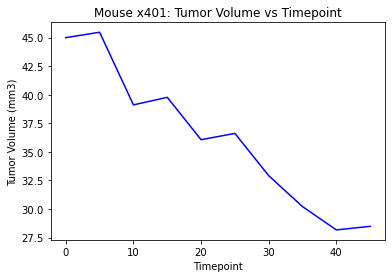

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse (x401) treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] =="Capomulin"]
x401_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'x401']
x401, = plt.plot(x401_df['Timepoint'],x401_df['Tumor Volume (mm3)'], color="blue", label="x401")
plt.title("Mouse x401: Tumor Volume vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

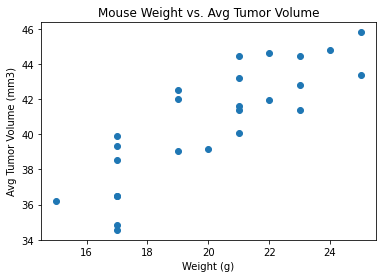

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# retrieve "Capomulin" data
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] =="Capomulin"]
# find the mean using groupby
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
# labels
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


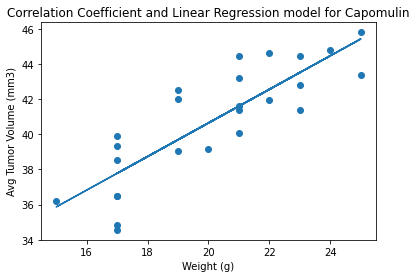

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] =="Capomulin"]
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()

r = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average['Tumor Volume (mm3)'])
corr = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

# Perform a linear regression
cap_slope, cap_int = st.linregress((capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)']))[0:2]
# Create equation of line
cap_fit = cap_slope * capomulin_average['Weight (g)'] + cap_int
# plot linear model on top of scatter plot
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], cap_fit)
plt.title("Correlation Coefficient and Linear Regression model for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()